<font color=green>To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.</font>

# Python Programming: Support Vector Machine

## Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

## **Example 1: Recipe Classification**



We are going to implement SVM on the example we mentioned in the overview section. As a recap, our aim is to classify a recipe as as either a muffin recipe or  a cupcake recipe. our dataset will comprise of a bunch of muffin and cupcake recipes. Remember that the difference between a muffin and a cupcake is that a muffin has more Flour while a cupcake has more butter and sugar.

**Load Data**

In [3]:
# Load the data set
# Dataset : https://bit.ly/muffins_and_capcakes

recipes = pd.read_csv('https://bit.ly/muffins_and_capcakes')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


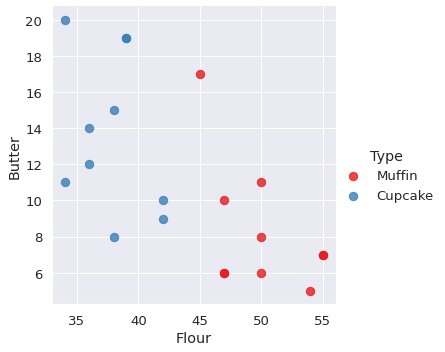

In [4]:
# We are going to use Flour and Butter as our classifying criteria. So we plot the two columns to see if we can apply svm on them
# Plot two ingredients
sns.lmplot('Flour', 'Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

From the graph we can have two classes, muffins indicated by red dots and cupcakes representated by the blue dots. We can also observe that indeed points that have a high concetration of flour are muffins and conversely, the ones that have a high concentration of butter are cupcakes. Hence we can use svm to train a model that will be able to classify a recipe as either a muffin recipe or a cupcake recipe.

**Fit the Model**

In [8]:
# Specify the input for the model

sugar_butter = recipes[['Flour', 'Butter']].values
# Put a label of either a muffin or not and assign it 0 or 1
type_label = np.where(recipes['Type']=='Muffin',0,1)


# Fit the model
model = SVC(kernel= 'linear')
model.fit(sugar_butter,type_label)

SVC(kernel='linear')

**Results Visualization**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


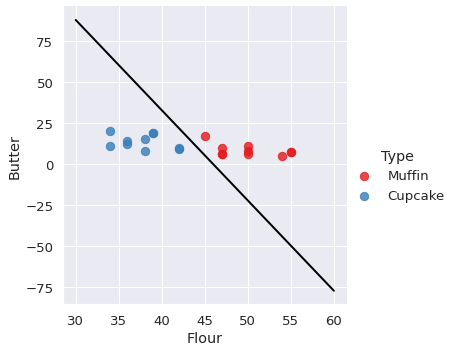

In [9]:
# Get the separating hyperplane
w = model.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane. We achieve this by creating a range numbers from the largest number of the butter vlaues and the smallest number of the butter values.  
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('Flour', 'Butter', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


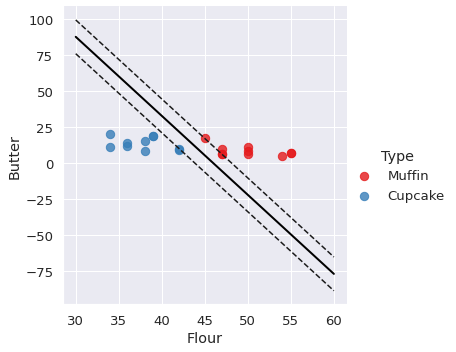

In [10]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sns.lmplot('Flour', 'Butter', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') #'k--' indicates that we want to draw a black dotted line
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=80, facecolors='none');


**Prediction and Evaluation**


In [ ]:
# Now that we have created our model let's use it to make some predictions. Remember the output of our model can either be 0 or 1. 0 being a muffin and 1 being a cupcake as we set it in the type_label variable.
# Predict if 60 parts flour and 30 parts butter
muffin_or_cupcake = model.predict([[60, 30]])
muffin_or_cupcake

Our model gave us an output of 0 which means that it correctly predicted a muffin. This is correct because as we stated earlier muffins have a high concentration of floor. For our understanding let's visualize where the point lies graphically


In [ ]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Butter', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(60, 30, 'yo', markersize='9');

In [ ]:
# We can also go an exra mile to create a function that helps us predict when recipe is muffin or cupcake

def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

# Predict if 60 parts flour and 30 parts butter
muffin_or_cupcake(60, 30)

So far we have only looked at how to implement Svm only on linearly separatable data. In the next session we are going to explore advanced SVM where we have situations in which we have high dimension data.

**Note**: In most cases you don't need to plot a gragh when you are doing svm especially if you are dealing with higher dimension planes. 



## Example 2: Breast Cancer classification
 

In this example, we are going to use a cancer dataset to build a model that classifies a cancer diagnosis as either  malignant (harmful) or benign (not harmful). The dataset comprises of 30 features.

**Loading Data**

In [ ]:
# Load data
data = pd.read_csv('http://bit.ly/breast_cancer_dataset')

# data.head()

**Data Exploration**

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop the column that has NaN values
Cancer_data = data.dropna(axis='columns')
Cancer_data


**Split the data into train and test sets**

In [ ]:
# Seperating the target from our data
 X = Cancer_data.drop(['diagnosis','id'],axis=1) # We remove diagnosis column since its our target column and id because its not relevant in diagnosis. 
 y = np.where(Cancer_data['diagnosis']=='M',0,1)

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape



(114,)

**Fitting the Model**

In [ ]:
# Let's now build the svm model 
cancer_model = SVC(kernel = 'linear')
# Train the model using the training set
cancer_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = cancer_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

**Performance and Ecavluation**

In [ ]:
# Now that we have trained our model, let's test how well it can predict the breast cancer of a patient

# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

# We've gotten a classification rate of 95.61%. This is a pretty good accuracy score 

# For further evaluation you can also check the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

**Conclusion**

Unlike the previous example, we did not need to plot a graph but we were able to get some pretty accurate results. One major resaon behind this is that we were dealing with multiple features so it would have been pretty hard to visualize. 

In the next session we are going to learn how to tune our parameters so as to achieve more desirable results from our svm model

## <font color= green>Challenge 1</fonts>

In [ ]:
# Classify the following dataset as either a yes or no using support vector machine model.
# Predict where this point would lie (-5.5561213215518,3.65465321681)
# Dataset -----> http://bit.ly/data_p

your code goes here

## <font color= green>Challenge 2</fonts>

In [ ]:
# Use the Titanic dataset that you used in Logictic regression and classify the passengers as either survived or not survived.
# -------
#  Dataset url = http://bit.ly/TitanicTrainDataset
# ----------
Your code goes here

## <font color= green>Challenge 3</fonts>

In [ ]:
# Use the titanic dataset that you used in Logistic Regression to classify whether a passangers survived or not
# -----
#  Dataset url -----> http://bit.ly/TitanicTrainDataset 
# ---------
Your code goes here

## <font color= green>Challenge 4</fonts>

In [ ]:
# Company wants to automate the loan eligibility process based on customer detail provided while filling online application form.
# To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.
# Your task is to predict the loan eligibility.
# -------
# Dataset url ----> http://bit.ly/loan_data